# Desafio Python e SQL

### Nesse desafio, vamos fazer uma consulta em SQL com uma condição e fazer o tratamento das informações no Python usando o pandas

- Calcule o lucro diário da empresa 

- Tabela com as Vendas -> dbo.FactSales
- Lucro é -> Sales Amount - TotalCost - DiscountAmount
- Lembre que podemos ter mais de 1 transação por dia na tabela, então uma opção é usar o método groupby do pandas
- Sugestão para ajudar na análise é plotar um gráfico do lucro diário

In [1]:
import pyodbc

dados_conexao = ("Driver={SQL Server};"
            "Server=ACER-RYZEN\SQLEXPRESS;"
            "Database=ContosoRetailDW;")

#caso precisasse de login e senha:
#dados_conexao = ("Driver={SQL Server Native Client 11.0};"
#            "Server=UKXXX00123,45600;"
#            "Database=DB01;"
#            "UID=Login;"
#            "PWD=Senha;")


conexao = pyodbc.connect(dados_conexao)
print('Conexão Bem sucedida')

cursor = conexao.cursor()




Conexão Bem sucedida


In [26]:
import pandas as pd
produtos_df = pd.read_sql('SELECT convert(date,DateKey) as Data,SalesAmount,DiscountAmount,TotalCost   FROM ContosoRetailDW.dbo.FactSales', conexao)
display(produtos_df)


c:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Data,SalesAmount,DiscountAmount,TotalCost
0,2007-01-02,1544.400,39.600,728.40
1,2007-02-12,78.605,0.995,40.60
2,2008-01-24,3628.500,61.500,1881.27
3,2008-01-13,2254.200,57.800,1063.20
4,2008-01-22,10207.080,261.720,3468.48
...,...,...,...,...
3406084,2007-10-09,4.750,0.000,2.40
3406085,2007-07-08,11976.000,0.000,3967.92
3406086,2009-03-06,849.830,49.990,281.52
3406087,2007-02-04,20310.750,344.250,6843.42


In [27]:
produtos_df['Lucro'] = produtos_df['SalesAmount'] - produtos_df['DiscountAmount'] - produtos_df['TotalCost']



In [34]:
df_lucrodiario = produtos_df[['Data','Lucro']].groupby(by=['Data']).sum()

def formatar(valor):
    return '{:,.2f}'.format(valor)

#df_lucrodiario['Lucro'] = df_lucrodiario['Lucro'].apply(formatar) #Formata os dados mas isso bug o grafico

display(df_lucrodiario)


,Lucro
Data,
2007-01-01,4.446594e+06
2007-01-02,4.423362e+06
2007-01-03,4.515993e+06
2007-01-04,4.447113e+06
2007-01-05,4.338266e+06
...,...
2009-12-27,5.438840e+06
2009-12-28,5.273078e+06
2009-12-29,5.523555e+06


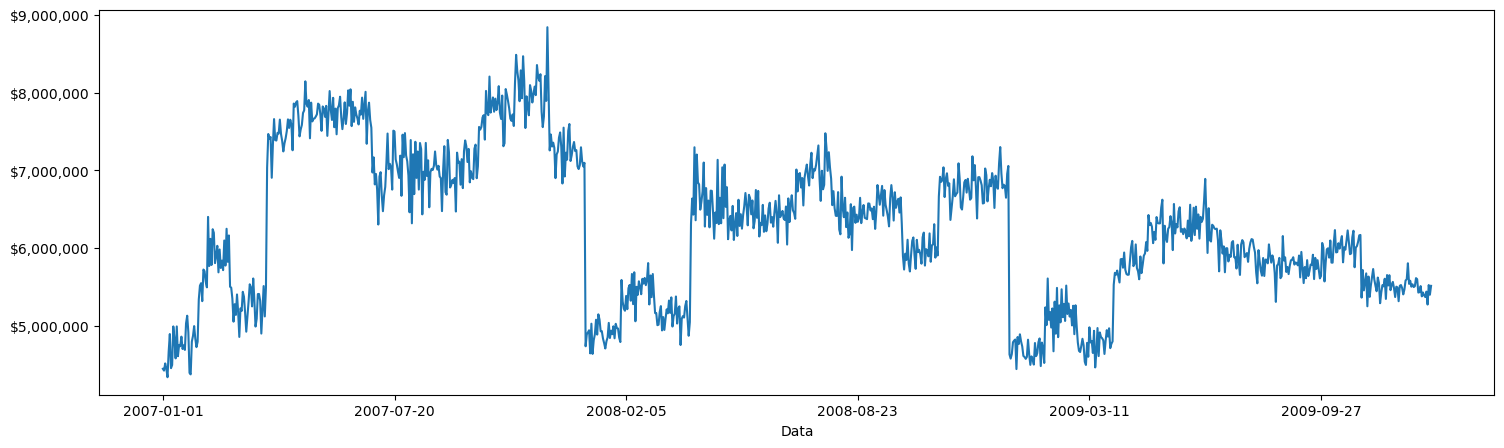

In [36]:
import matplotlib
import matplotlib.pyplot as plt

grafico = df_lucrodiario['Lucro'].plot(figsize=(18, 5))
grafico.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()
